In [1]:
import random
from copy import deepcopy

import os
import json
from pathlib import Path
from easydict import EasyDict

import json 
import numpy as np 
from sklearn.model_selection import StratifiedGroupKFold 

In [148]:
config = EasyDict({
    'input1_path': '/opt/ml/input/data/ICDAR17_Korean',
    'input2_path': '/opt/ml/input2',
    'total_path': '/opt/ml/level2-data-annotation_cv-level2-cv-11/SEUNGHYUN_WORKSPACE/data/',
    'cv_path': '/opt/ml/cv',
    'origin_remove_list': ['img_4005.jpg',
                      'img_4002.jpg',
                      'img_4401.jpg',
                      'img_4407.jpg',
                      'img_4295.jpg',
                      'img_4697.jpg',
                      'img_4586.jpg',
                      'img_4058.jpg',
                      'img_4217.jpg',
                      'img_4201.jpg',
                      'img_4192.jpg',
                      'img_4180.jpg',
                      'img_4036.jpg',
                      'img_4044.jpg',
                      'img_4097.jpg',
                      'img_4040.jpg'],
    'add_remove_list': ['20210913_003541.jpg',
                         '20190625_140214.jpg',
                         '20200918_202819.jpg',
                         '20210910_141434.jpg',
                         '20191222_225910.jpg',
                         '20210913_003422.jpg',
                         '20210913_003230.jpg',
                         '20200812_155356.jpg',
                         '20210910_125605.jpg',
                         '20210108_230110.jpg',
                         '20200825_205146.jpg',
                         '20210111_200715.jpg',
                         '20200902_162509.jpg',
                         '20210908_200140.jpg',
                         '20210908_125422.jpg',
                         '20210114_173547.jpg',
                         '20191219_170225.jpg',
                         '20210911_130605.jpg',
                         '0N8A5655.jpg',
                         '20201224_124508.jpg',
                         '20210908_130808.jpg',
                         '20210913_003516.jpg',
                         '20210913_001739.jpg',
                         '20210913_003852.jpg',
                         '20200829_012546.jpg',
                         '20171208_190335.jpg',
                         '20210908_125601.jpg',
                         '20191017_171859.jpg',
                         '20210908_125614.jpg',
                         '20210909_164347.jpg',
                         '20210909_235358.jpg',
                         '20171115_221838.jpg',
                         '20210909_175403.jpg',
                         '20171230_134905.jpg',
                         '20200731_194958.jpg',
                         '20200830_143751.jpg',
                         '20200906_182628.jpg',
                         '20191222_173310.jpg',
                         '20200729_174803.jpg',
                         '20201202_222753.jpg',
                         '20210913_002916.jpg',
                         '20180601_164446.jpg',
                         '20201029_020252.jpg',
                         '20201223_155117.jpg',
                         '20210909_122213.jpg',
                         '20171031_135049.jpg',
                         '20200823_212502.jpg',
                         '20210910_125221.jpg',
                         '20200330_233903.jpg',
                         '20210909_173711.jpg',
                         '20210918_220739.jpg',
                         '20210916_201117.jpg',
                         '20210919_135518.jpg',
                         '20210918_225734.jpg',
                         '20210919_131146.jpg',
                         '20210918_222840.jpg',
                         '20210919_134038.jpg',
                         '20210919_150838.jpg',
                         '20210916_201112.jpg',
                         '20210918_224758.jpg',
                         '20210918_215341.jpg',
                         '20210916_201149.jpg',
                         '20210919_151957.jpg',
                         '20210917_130432.jpg',
                         '20210916_202324.jpg',
                         '20210918_223047.jpg',
                         '20210916_131555.jpg',
                         '20210918_220749.jpg',
                         '20210918_221735.jpg',
                         '20210918_224842.jpg',
                         '20210918_224303.jpg',
                         '20210918_223900.jpg',
                         '20210916_204603.jpg',
                         '20210918_223307.jpg',
                         '20210916_204628.jpg',
                         '20210916_201426.jpg',
                         '20210919_131139.jpg',
                         '20210916_204605.jpg',
                         '20210916_202328.jpg',
                         '20210918_230745.jpg',
                         '20210918_105750.jpg',
                         '20210918_224054.jpg',
                         '20210916_201233.jpg',
                         '20210915_205259.jpg',
                         '20210919_140711.jpg',
                         '20210919_132422.jpg',
                         '20210916_203133.jpg',
                         '20210919_151337.jpg',
                         '20210917_130459.jpg',
                         '20210919_151055.jpg',
                         '20210916_204517.jpg',
                         '20210916_203124.jpg',
                         '20210916_201257.jpg',
                         '20210918_230051.jpg',
                         '20210918_211449.jpg',
                         '20210916_201721.jpg',
                         '20210916_201047.jpg',
                         '20210919_152015.jpg',
                         '20210916_200748.jpg',
                         '20210918_225710.jpg',
                         '20210918_225248.jpg',
                         '1632655330045-20.jpg',
                         '1632650015287-8.jpg',
                         '20210926_152812.jpg',
                         '1632650015287-23.jpg',
                         '1632646840914-3.jpg',
                         '1632646840914-24.jpg',
                         '20210926_153602.jpg',
                         '20210926_104838.jpg',
                         '1632640391949-4.jpg',
                         '20210925_135728.jpg',
                         '20210926_104458.jpg',
                         '20210922_141543.jpg',
                         '20210925_134733.jpg',
                         '20210925_135221.jpg',
                         '20210920_112933.jpg',
                         '20210919_165118.jpg',
                         '20210925_135858.jpg',
                         '20210913_222612.jpeg',
                         '20210915_193912.jpeg',
                         '20210913_005440.jpg',
                         '20210914_222525.jpg',
                         '20210913_005959.jpg',
                         '20210913_005210.jpg',
                         '20210915_193809.jpeg',
                         '20210913_005932.jpg',
                         '20210915_193839.jpeg'] 
    })

In [207]:
# data = read_json(os.path.join(config.input1_path, 'ufo/train.json'))
# add_data = read_json(os.path.join(config.input2_path, 'ufo/train.json'))

In [205]:
# rm_list = [i.split('.')[0] for i in config.add_remove_list]
# counter=0
# final_add_data = deepcopy(add_data)
# for f in add_data['images']:
#     fname = f.split('.')[0]
#     if fname in rm_list:
#         counter+=1
        
#         final_add_data['images'].pop(f)

In [209]:
# len(add_data['images']), len(final_add_data['images'])

In [210]:
# with open(os.path.join(config.total_path, "new_additional_train.json"), "w") as json_file:
#     json.dump(final_add_data, json_file)

## From Here

In [2]:
data = read_json(os.path.join(config.total_path, 'new_origin_train.json'))
add_data = read_json(os.path.join(config.total_path, 'new_additional_train.json'))

data['images'].update(add_data['images'])

NameError: name 'read_json' is not defined

In [212]:
len(data['images']), len(add_data['images'])

(1681, 1161)

In [214]:
### Save ###
# with open(os.path.join(config.total_path, "new_total_train.json"), "w") as json_file:
#     json.dump(data, json_file)

In [3]:
def read_json(filename):
    with Path(filename).open(encoding='utf8') as handle:
        ann = json.load(handle)
    return ann

def write_json(data, filename, savepath):
    with open(os.path.join(savepath, filename), "w") as json_file:
        json.dump(data, json_file)
        print('saved')

In [6]:
total = read_json('/opt/ml/level2-data-annotation_cv-level2-cv-11/SEUNGHYUN_WORKSPACE/data/icdar19_and_total.json')

# 8:2 임의 split

In [200]:
def data_split(total_data, val_size=0.2):
    ann = deepcopy(total_data)
    val_size = int(len(ann['images']) * val_size)
    
    random.seed(42)
    
    val_ann = {}
    val_ann['images'] = {}
    
    val_imgs = random.sample(list(ann['images'].keys()), val_size)
    
    for f in val_imgs:
        data = ann['images'][f]
        val_ann['images'][f] = data

        ann['images'].pop(f)
        
    return ann, val_ann

In [201]:
if not os.path.exists(config.cv_path):
    os.makedirs(config.cv_path)

In [203]:
train_ann, val_ann = data_split(data, 0.2)

In [204]:
print(len(train_ann['images']), len(val_ann['images']))
write_json(train_ann, 'cv_new_train.json', config.cv_path)
write_json(val_ann, 'cv_new_val.json', config.cv_path)

1345 336
saved
saved


In [ ]:
# 이미지 태그
# 이미지당 단어 개수
# 단어 태그
# 언어
# 방향

In [ ]:
# 'img_h', 'img_w', 'words', 'tags'

In [21]:
total['images']['img_4380.jpg'].keys()

dict_keys(['img_h', 'img_w', 'words', 'tags', 'license_tag'])

In [ ]:
total['images']['20210913_004323.jpg'].keys()

dict_keys(['paragraphs', 'words', 'chars', 'img_w', 'img_h', 'tags', 'relations', 'annotation_log', 'license_tag'])

# StratifiedKFold - Text 개수

In [241]:
import seaborn as sns
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold


In [220]:
data = read_json('/opt/ml/input/data/total/ufo/new_total_train.json')
len(data['images'])

1681

In [224]:
def get_box_size(quads):
    """ 단어 영역의 사각형 좌표가 주어졌을 때 가로, 세로길이를 계산해주는 함수.
    TODO: 각 변의 길이를 단순히 max로 처리하기때문에 직사각형에 가까운 형태가 아니면 약간 왜곡이 있다.
    Args:
        quads: np.ndarray(n, 4, 2) n개 단어 bounding-box의 4개 점 좌표 (단위 pixel)
    Return:
        sizes: np.ndarray(n, 2) n개 box의 (height, width)쌍
    """
    dists = []
    for i, j in [(1, 2), (3, 0), (0, 1), (2, 3)]: # [right(height), left(height), upper(width), lower(width)] sides
        dists.append(np.linalg.norm(quads[:, i] - quads[:, j], ord=2, axis=1))

    dists = np.stack(dists, axis=-1).reshape(-1, 2, 2) # shape (n, 2, 2) widths, heights into separate dim
    return np.rint(dists.mean(axis=-1)).astype(int)

def rectify_poly(poly, direction, img_w, img_h):
    """일반 polygon형태인 라벨을 크롭하고 rectify해주는 함수.
    Args:
        poly: np.ndarray(2n+4, 2) (where n>0), 4, 6, 8
        image: np.ndarray opencv 포멧의 이미지
        direction: 글자의 읽는 방향과 진행 방향의 수평(Horizontal) 혹은 수직(Vertical) 여부
    Return:
        rectified: np.ndarray(2, ?) rectify된 단어 bbox의 사이즈.
    """
    
    n_pts = poly.shape[0]
    assert n_pts % 2 == 0
    if n_pts == 4:
        size = get_box_size(poly[None])
        h = size[:, 0] / img_h
        w = size[:, 1] / img_w
        return np.stack((h,w))

    def unroll(indices):
        return list(zip(indices[:-1], indices[1:]))

    # polygon하나를 인접한 사각형 여러개로 쪼갠다.
    indices = list(range(n_pts))
    if direction == 'Horizontal':
        upper_pts = unroll(indices[:n_pts // 2]) # (0, 1), (1, 2), ... (4, 5)
        lower_pts = unroll(indices[n_pts // 2:])[::-1] # (8, 9), (7, 8), ... (6, 7)

        quads = np.stack([poly[[i, j, k, l]] for (i, j), (k, l) in zip(upper_pts, lower_pts)])
    else:
        right_pts = unroll(indices[1:n_pts // 2 + 1]) # (1, 2), (2, 3), ... (4, 5)
        left_pts = unroll([0] + indices[:n_pts // 2:-1]) # (0, 9), (9, 8), ... (7, 6)

        quads = np.stack([poly[[i, j, k, l]] for (j, k), (i, l) in zip(right_pts, left_pts)])

    sizes = get_box_size(quads)
    if direction == 'Horizontal':
        h = sizes[:, 0].max() / img_h
        widths = sizes[:, 1]
        w = np.sum(widths) / img_w
        return np.stack((h,w)).reshape(2,-1)
        #return np.stack((h,w))
    elif direction == 'Vertical':
        heights = sizes[:, 0]
        w = sizes[:, 1].max() / img_w
        h = np.sum(heights) / img_h
        return np.stack((h,w)).reshape(2,-1)
    else:
        h = sizes[:, 0] / img_h
        w = sizes[:, 1] / img_w
        return np.stack((h,w),-1)

In [225]:
df = {}
df['image'] = []
df['word_counts'] = []
df['image_width'] = []
df['image_height'] = []
df['image_tags'] = []
img_tags = []

quads = []
polys = []
seq_length = []
hor_sizes = []
ver_sizes = []
irr_sizes = []
languages = []
orientation = []
word_tags = []
aspect_ratio = []
ver_string = []

for image_key, image_value in data["images"].items():
    df['image'].append(image_key)
    img_w = image_value['img_w']
    img_h = image_value['img_h']
    df['image_width'].append(img_w)
    df['image_height'].append(img_h)
    df['image_tags'].append(image_value['tags'])
    df['image_tags']= [['None'] if v is None else v for v in df['image_tags']] # our data does not inlcude multi-tag images 
    word_ann = image_value['words']
    count_ill = 0 
    for word in word_ann.values():
        if word['illegibility']== False:
            orientation.append(word['orientation'])
            orientation = [v for v in orientation]
            seq_length.append(len(word['transcription']))
            languages.append(word['language'])
            languages = [['None'] if v is None else v for v in languages] # our data does not inlcude multi-language words
            if word['word_tags'] != None:
                word_tags.extend(word['word_tags'][:])
            elif word['word_tags']== None:
                word_tags.append('None')
            poly = np.int32(word['points'])
            size = rectify_poly(poly, word['orientation'], img_w, img_h)
            if word['orientation'] == 'Horizontal':
                hor_sizes.append(size)
            elif word['orientation'] == 'Vertical':
                ver_sizes.append(size)
            else:
                irr_sizes.append(size)
            
        else:
            count_ill += 1
    df['word_counts'].append(len(word_ann)-count_ill)

        
all_sizes = hor_sizes + ver_sizes + irr_sizes
quad_area = [all_sizes[i][0]*all_sizes[i][1] for i in range(len(all_sizes))]
total_area = []
for s in quad_area:
    if s.shape[0] == 1:
        total_area.append(np.sum(s[0])) 
    else:
        total_area.append(np.sum(s))

hor_aspect_ratio = [hor_sizes[i][1]/hor_sizes[i][0] for i in range(len(hor_sizes)) if hor_sizes[i][0]!=0]
ver_aspect_ratio = [ver_sizes[i][1]/ver_sizes[i][0] for i in range(len(ver_sizes))]

image_df = pd.DataFrame.from_dict(df)
image_df['image_tags'] = image_df['image_tags'].apply(lambda x: ','.join(map(str, x)))


In [236]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for i, (train_index, valid_index) in enumerate(folds.split(image_df,image_df["word_counts"])):
    fold_num = i+1
    X_train = image_df.iloc[train_index]
    X_val = image_df.iloc[valid_index]


/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [238]:
def plot_dist(df, field, bins, color, xlabel, ylabel, title):
    sns.set(color_codes=True)
    fig, ax = plt.subplots(figsize=(18,6))
    sns.distplot(df[field], bins=bins, color=color, ax=ax)
    
    ax.set_xlabel(xlabel, fontsize=13)
    ax.set_ylabel(ylabel, fontsize=13)
    ax.set_title(title, fontsize=20)
    plt.show()

In [252]:
X_train['word_counts'].value_counts().sort_index()

1      110
2      117
3      118
4      105
5       97
      ... 
155      1
159      1
174      1
178      1
222      1
Name: word_counts, Length: 93, dtype: int64

In [253]:
X_val['word_counts'].value_counts().sort_index()

1      28
2      29
3      29
4      26
5      24
       ..
97      1
102     1
104     1
109     1
158     1
Name: word_counts, Length: 63, dtype: int64

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


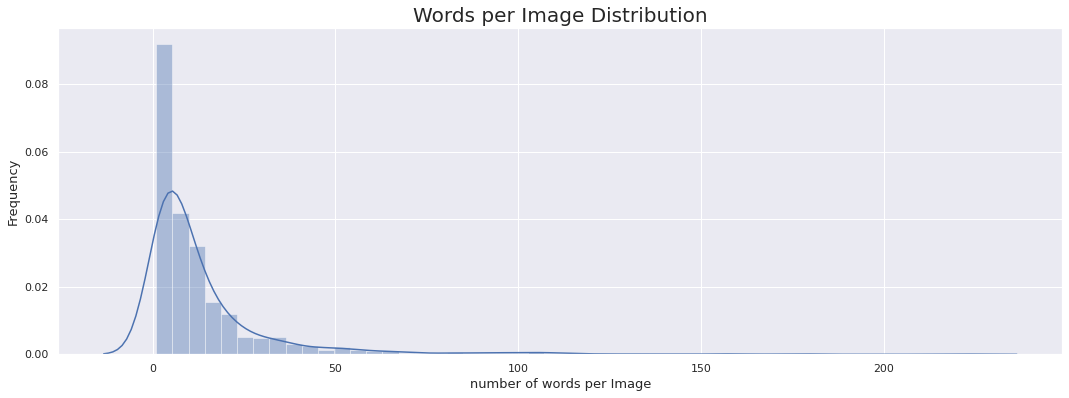

In [242]:
plot_dist(df=X_train, field='word_counts', bins=50, color='b', xlabel='number of words per Image', \
          ylabel='Frequency', title='Words per Image Distribution')

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


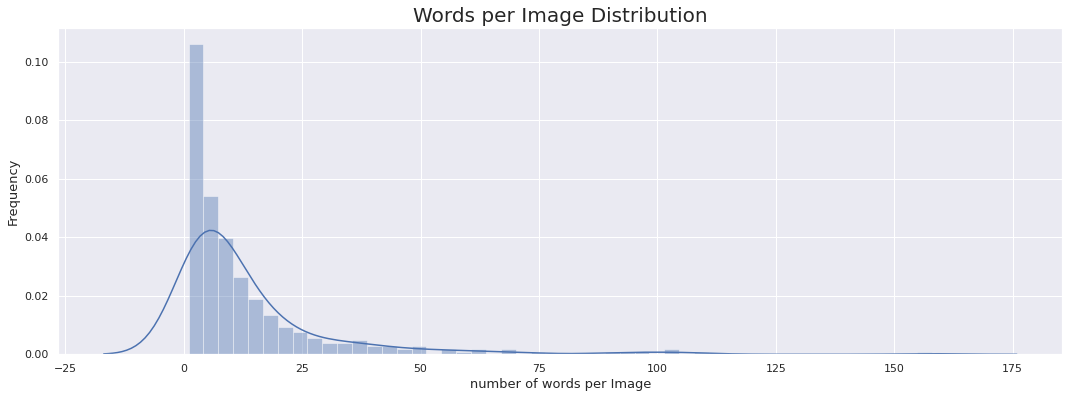

In [243]:
plot_dist(df=X_val, field='word_counts', bins=50, color='b', xlabel='number of words per Image', \
          ylabel='Frequency', title='Words per Image Distribution')

336

In [258]:
def stratified_data_split(total_data,train_df, val_df):
    ann = deepcopy(total_data)
    
    random.seed(42)
    
    val_ann = {}
    val_ann['images'] = {}
    
    val_imgs = val_df['image'].values
    
    for f in val_imgs:
        data = ann['images'][f]
        val_ann['images'][f] = data

        ann['images'].pop(f)
        
    return ann, val_ann

In [260]:
train_ann, val_ann = stratified_data_split(data,X_train, X_val)

In [263]:
len(train_ann['images']), len(val_ann['images'])

(1345, 336)

In [266]:
X_train.shape[0], X_val.shape[0]

(1345, 336)

In [269]:
path = '/opt/ml/input/data/total/ufo/'

In [270]:
write_json(train_ann, 'cv_stratified_train.json', path)
write_json(val_ann, 'cv_stratified_val.json', path)

saved
saved


In [271]:
32*42

1344

Error in atexit._run_exitfuncs:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3810, in atexit_operations
    self.reset(new_session=False)
  File "/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 1421, in reset
    self.history_manager.reset(new_session)
  File "/opt/conda/lib/python3.8/site-packages/IPython/core/history.py", line 592, in reset
    self.dir_hist[:] = [os.getcwd()]
FileNotFoundError: [Errno 2] No such file or directory
